This script conducts validation tests on the random forest models for the Democratic primaries. I withhold one year at a time from the trianing data and then test on all elections from that year. I also create a new 'past_turnout' column for each validation model that does not incorporate the turnout from the year being tested. 

In [469]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics

In [470]:
#Download data
#Read in data and filter out test data

turnout_train_dem = pd.read_csv("turnout_train_dem.csv")


#filter out 2018 data
turnout_train_rep_use = turnout_train_rep[turnout_train_rep['Year'] != 2018]





R^2:  0.9896150655447687
Mean Absolute Error (MAE): 0.36242582677165325
Mean Squared Error (MSE): 0.5243488611023607


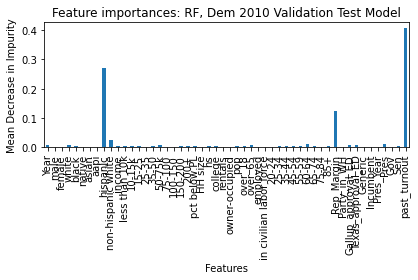

In [493]:
#Validation Test: 2010
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2010.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2010)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2010 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2010]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: RF, Dem 2010 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [494]:
#Test 2010 gov

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2010_Dem_Gov']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.5123825237879912
Mean Absolute Error (MAE): 4.275243700787402
Mean Squared Error (MSE): 50.88356103240159


R^2:  0.9790345188290325
Mean Absolute Error (MAE): 0.6183012795275585
Mean Squared Error (MSE): 1.3714362594586575


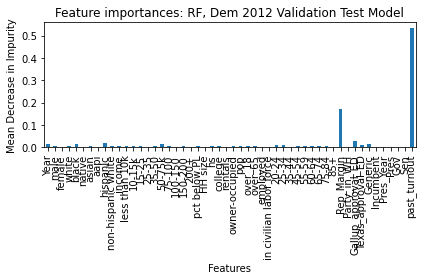

In [495]:
#Validation Test: 2012
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2012.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2012)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2012 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2012]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: RF, Dem 2012 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [496]:
#Test 2012 sen
np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2012_Dem_Sen']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.5424818759095732
Mean Absolute Error (MAE): 3.3547870078740156
Mean Squared Error (MSE): 18.042680302322832


In [497]:
#Test 2012 pres

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2012_Dem_Pres']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.740616374104543
Mean Absolute Error (MAE): 3.2650393700787395
Mean Squared Error (MSE): 16.927344926771646


R^2:  0.979590734957982
Mean Absolute Error (MAE): 0.6285261811023619
Mean Squared Error (MSE): 1.4295114138385794


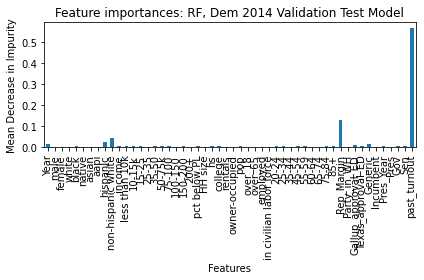

In [498]:
#Validation Test: 2014
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2014.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2014)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2014 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2014]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: RF, Dem 2014 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [500]:
#Test 2014 gov

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2014_Dem_Gov']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.41158920980083424
Mean Absolute Error (MAE): 3.4888889763779525
Mean Squared Error (MSE): 26.397634096771654


In [501]:
#Test 2014 sen

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2014_Dem_Sen']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.44190633466762663
Mean Absolute Error (MAE): 3.260302362204724
Mean Squared Error (MSE): 20.340705417165346


R^2:  0.9846032744302488
Mean Absolute Error (MAE): 0.4799523622047242
Mean Squared Error (MSE): 0.9417432012362194


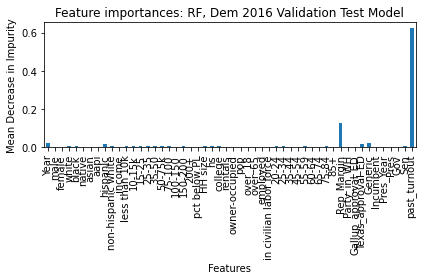

In [502]:
#Validation Test: 2016
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2016.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2016)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2016 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2016 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2016]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: RF, Dem 2016 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [503]:
#Test 2016 pres

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2016 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2016_Dem_Pres']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.7356732460234157
Mean Absolute Error (MAE): 3.0141519685039375
Mean Squared Error (MSE): 15.940222791023626
